In [1]:
# Import dependencies
import pandas as pd
import matplotlib as plt
import sklearn as skl
import tensorflow as tf

In [2]:
# Load existing base station site data
path_existing = "resources/existing-commercial-wireless-telecommunication-services-facilities-in-san-francisco.csv"
existing_sites_df = pd.read_csv(path_existing)

# Load proposed base station site data
path_proposed = "resources/proposed-commercial-wireless-telecommunication-services-facilities-in-san-francisco.csv"
proposed_sites_df = pd.read_csv(path_proposed)

## Existing Sites

In [3]:
existing_sites_df.head()

,Carrier,ID,Search Ring Name ID,Block,Lot,Zoning District,Hight and Bulk District,Type of Building,Preference (1-7),Type of Consumer Services,...,Number of Antennas,Location of BTS,Type of Technology,Radio Frequency Range (Megahertz),Power Output of Equipment (Watts),Height to Top of Antenna,Name of Community Liason,Phone Number of Community Liason,Comments,Location 1
0,AT&T,CCL00001,Marshall Hale,1017,28,RM-2,80-E,Commercial,7,"voice, video & data",...,9.0,Basement,"UMTS, LTE","700, 850, 1900,1700,2300",16650,87,Jim Sidorick,925-277-6026,NaN,"{'latitude': '37.786884', 'needs_recoding': Fa..."
1,AT&T,CCL00002,Embarcadero,237,014/016,C-3-O,350-S,Commercial,NaN,"voice, video & data",...,9.0,Basement,"UMTS, LTE","700, 850, 1900,1700,2300",16650,252,Jim Sidorick,925-277-6026,NaN,"{'latitude': '37.793983', 'needs_recoding': Fa..."
2,AT&T,CCL00005,Mercy High School,7231,3,RH-1(D),40-X,Public,1,"voice, video & data",...,12.0,Ground Fl,"UMTS, LTE","700, 850, 1900,1700,2300",16650,67,Jim Sidorick,925-277-6026,NaN,"{'latitude': '37.729811', 'needs_recoding': Fa..."
3,AT&T,CCL00006,Bernal Heights,3637,69,MISSION STREET,40-X/65-B,Commercial,6,"voice, video & data",...,9.0,Ground Fl,"UMTS, LTE","700, 850, 1900,1700,2300",16650,120,Jim Sidorick,925-277-6026,NaN,"{'latitude': '37.755217', 'needs_recoding': Fa..."
4,AT&T,CCL00049,Marina Safeway,503,30,RC-3,65-A/40-X,Commercial,4,"voice, video & data",...,6.0,Basement,"UMTS, LTE","700, 850, 1900,1700,2300",7182,127,Jim Sidorick,925-277-6026,NaN,"{'latitude': '37.800865', 'needs_recoding': Fa..."


In [4]:
existing_sites_df.drop_duplicates(subset=["ID "], inplace=True)

existing_sites_df["ID "].duplicated().any()

False

In [5]:
len(existing_sites_df)

1226

In [6]:
existing_sites_df.rename(columns={
    "ID ":"id"},inplace=True)

existing_sites_df.set_index("id", inplace=True)
existing_sites_df.head()

,Carrier,Search Ring Name ID,Block,Lot,Zoning District,Hight and Bulk District,Type of Building,Preference (1-7),Type of Consumer Services,Type of Consumer Products,Number of Antennas,Location of BTS,Type of Technology,Radio Frequency Range (Megahertz),Power Output of Equipment (Watts),Height to Top of Antenna,Name of Community Liason,Phone Number of Community Liason,Comments,Location 1
id,,,,,,,,,,,,,,,,,,,,
CCL00001,AT&T,Marshall Hale,1017,28,RM-2,80-E,Commercial,7,"voice, video & data",wireless phones & modems,9.0,Basement,"UMTS, LTE","700, 850, 1900,1700,2300",16650,87,Jim Sidorick,925-277-6026,NaN,"{'latitude': '37.786884', 'needs_recoding': Fa..."
CCL00002,AT&T,Embarcadero,237,014/016,C-3-O,350-S,Commercial,NaN,"voice, video & data",wireless phones & modems,9.0,Basement,"UMTS, LTE","700, 850, 1900,1700,2300",16650,252,Jim Sidorick,925-277-6026,NaN,"{'latitude': '37.793983', 'needs_recoding': Fa..."
CCL00005,AT&T,Mercy High School,7231,3,RH-1(D),40-X,Public,1,"voice, video & data",wireless phones & modems,12.0,Ground Fl,"UMTS, LTE","700, 850, 1900,1700,2300",16650,67,Jim Sidorick,925-277-6026,NaN,"{'latitude': '37.729811', 'needs_recoding': Fa..."
CCL00006,AT&T,Bernal Heights,3637,69,MISSION STREET,40-X/65-B,Commercial,6,"voice, video & data",wireless phones & modems,9.0,Ground Fl,"UMTS, LTE","700, 850, 1900,1700,2300",16650,120,Jim Sidorick,925-277-6026,NaN,"{'latitude': '37.755217', 'needs_recoding': Fa..."
CCL00049,AT&T,Marina Safeway,503,30,RC-3,65-A/40-X,Commercial,4,"voice, video & data",wireless phones & modems,6.0,Basement,"UMTS, LTE","700, 850, 1900,1700,2300",7182,127,Jim Sidorick,925-277-6026,NaN,"{'latitude': '37.800865', 'needs_recoding': Fa..."


In [7]:
# Count NaN values for Frequency Range
existing_sites_df["Radio Frequency Range (Megahertz)"].isnull().sum()

2

In [8]:
# Count NaN values for Output Power
existing_sites_df["Power Output of Equipment (Watts)"].isnull().sum()

318

In [9]:
# Count NaN values for Tower Height
existing_sites_df["Height to Top of Antenna"].isnull().sum()

126

Clean Existing Sites df

In [10]:
# List columns for existing_sites_df
existing_sites_df.columns

Index(['Carrier', 'Search Ring Name ID', 'Block', 'Lot', 'Zoning District',
       'Hight and Bulk District', 'Type of Building', 'Preference (1-7)',
       'Type of Consumer Services', 'Type of Consumer Products',
       'Number of Antennas', 'Location of BTS', 'Type of Technology',
       'Radio Frequency Range (Megahertz)',
       'Power Output of Equipment (Watts)', 'Height to Top of Antenna',
       'Name of Community Liason', 'Phone Number of Community Liason',
       'Comments', 'Location 1'],
      dtype='object')

In [11]:
# Split location 1 column
locs = existing_sites_df[["Location 1"]]

In [12]:
import ast
import numpy as np

latitude = []
longitude = []

for row in locs.iterrows():
    info = row[1]
    info_1 = info[0]
    info_dict = ast.literal_eval(info_1)

    if 'latitude' in info_dict.keys():
        latitude.append(float(info_dict['latitude']))        
    else:
        latitude.append(np.nan)
        
    if 'longitude' in info_dict.keys():
        longitude.append(float(info_dict['longitude']))
    else:
        longitude.append(np.nan)

In [13]:
existing_sites_lat_long_df = existing_sites_df[["Carrier","Number of Antennas",
                                                "Radio Frequency Range (Megahertz)",
                                               "Power Output of Equipment (Watts)",
                                               "Height to Top of Antenna"]].copy()
existing_sites_lat_long_df["latitude"] = latitude
existing_sites_lat_long_df["longitude"] = longitude

# Rename Columns
existing_sites_lat_long_df.rename(columns={
    "Carrier":"carrier",
    "Number of Antennas":"num_ant",
    "Radio Frequency Range (Megahertz)":"RF_band",
    "Power Output of Equipment (Watts)":"output_pwr",
    "Height to Top of Antenna":"ant_height"},inplace=True)

existing_sites_lat_long_df.head(5)

,carrier,num_ant,RF_band,output_pwr,ant_height,latitude,longitude
id,,,,,,,
CCL00001,AT&T,9.0,"700, 850, 1900,1700,2300",16650,87,37.786884,-122.45489
CCL00002,AT&T,9.0,"700, 850, 1900,1700,2300",16650,252,37.793983,-122.39962
CCL00005,AT&T,12.0,"700, 850, 1900,1700,2300",16650,67,37.729811,-122.47384
CCL00006,AT&T,9.0,"700, 850, 1900,1700,2300",16650,120,37.755217,-122.41836
CCL00049,AT&T,6.0,"700, 850, 1900,1700,2300",7182,127,37.800865,-122.42503


In [14]:
# sites_encoded = pd.get_dummies(existing_sites_lat_long_df, columns=["carrier","RF_band"])
# sites_encoded.head(5)

In [15]:
# # Need to use regex to parse height column
# import re

# test = []
# test_orig = []

# height_test = existing_sites_lat_long_df["ant_height"].dropna()

# str_test = re.compile(r"""(\d+)' *(\d+)(?:"|'')?""")
# str_test_1 = r"""(\S+)' *(\S+)(?:"|'')?"""
# str_test_1 = r"""(.+)' *(.+)(?:"|'')?"""
# # str_test_1 = r"""(.+)' *(.+)(?:)"|''?"""

# for item in height_test:
#     print(re.findall(str_test_1,item))
#     test.append(re.findall(str_test_1,item))
#     test_orig.append(re.findall(str_test_1,item))
    

In [16]:
# # for item in test:
# #     if item != []:
# #         print(item[0][1].split('"'))
        
# for i in range(0,len(test)):
#     if test[i] != []:
# #         print(test[i][0][1])
#         inch = test[i][0][1].split('"')
#         test[i] = float(test[i][0][0]) + float(inch[0])/12

In [17]:
# test

In [18]:
# Drop null values from height column
existing_cleaned_df = existing_sites_lat_long_df[existing_sites_lat_long_df["ant_height"].notna()]
existing_cleaned_df.head()

,carrier,num_ant,RF_band,output_pwr,ant_height,latitude,longitude
id,,,,,,,
CCL00001,AT&T,9.0,"700, 850, 1900,1700,2300",16650,87,37.786884,-122.45489
CCL00002,AT&T,9.0,"700, 850, 1900,1700,2300",16650,252,37.793983,-122.39962
CCL00005,AT&T,12.0,"700, 850, 1900,1700,2300",16650,67,37.729811,-122.47384
CCL00006,AT&T,9.0,"700, 850, 1900,1700,2300",16650,120,37.755217,-122.41836
CCL00049,AT&T,6.0,"700, 850, 1900,1700,2300",7182,127,37.800865,-122.42503


In [19]:
# Need to use regex to parse height column
import re

height_clean_conv = []
height_clean_conv_orig = []

height_clean = existing_cleaned_df["ant_height"].copy()

str_test_1 = r"""(.+)' *((.+)(?:"|''))?"""
# str_test_1 = r"""(.+)' *((.+)?")"""

for item in height_clean:
#     print(re.findall(str_test_1,item))
    height_clean_conv.append(re.findall(str_test_1,item))
#     height_clean_conv_orig.append(re.findall(str_test_1,item))
    

In [20]:
# len(height_clean)

In [21]:
# height_clean_conv

In [22]:
for i in range(0,len(height_clean_conv)):
    if height_clean_conv[i] != []:
#         print(float(height_clean_conv[i][0][-1]))
        if height_clean_conv[i][0][-1] != "":    
            inch = height_clean_conv[i][0][-1]
            height_clean_conv[i] = str(float(height_clean_conv[i][0][0]) + float(inch)/12)
        else:
            height_clean_conv[i] = str(float(height_clean_conv[i][0][0]))
    else:
        height_clean_conv[i] = 'NaN'

In [23]:
# height_clean_conv_df = pd.DataFrame({
#     "ant_height_clean":height_clean_conv
# },index=height_clean.index)
# height_clean_conv_df.head()

In [24]:
# height_clean_conv

In [25]:
height_cor = []

for i in range(0,len(height_clean)):
    if height_clean_conv[i] != 'NaN':
        height_cor.append(height_clean_conv[i])
    else:
        height_cor.append(height_clean[i])

In [26]:
# height_cor

In [27]:
for i in range(0,len(height_cor)):
    if "," in height_cor[i]:
        height_cor_split = height_cor[i].split(", ")
        h = 0
        for item in height_cor_split:
            print(item)
            if float(item) > h:
                h = float(item)
                height_cor[i] = item

72
92


In [28]:
# Reassign DAS to a height of 15
for i in range(0,len(height_cor)):
    if "DAS" in height_cor[i]:
        height_cor[i] = '15'

In [29]:
for item in height_cor:
    print(item)

87
252
67
120
127
51
37
70
65
67
68
72
62
48
54
30
56
166
15
43
78
91
69
42
90
63
83
97
85
62
68
73
256
55
77
61
65
48
75
46
57
82
48
57
55
54
50
61
63
44
83
48
60
32
51
25
44
42
25
78
24
31
47
50
60
59
47
92
95
119
37
37
37
37
37
37
37
38
56
26
21
67
21
28
29
27
31
31
22
39
23
27
59
85
65
38
95
68
58
54
55
51
101
49
65
55
65
35
36
54
78
46
34
60
79
42
72
87
42
56
81
37
40
78
99
57
44
34
64
42
34
56
24
39
35
84
80
8
52
138
53
46
47
26
47
31
27
55
80
58
55
30
73
58
69
59
50
129
70
42
30
48
37
153
49
50
28
50
47
28
108
99
52
88
39
30
66
30
40
42
114
52
93
78
52
97
42
50
78
61
25
100
36
87
56
80
30
62
29
99
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
101
78.4
35.8
77
25.0
25.0
24.0
28.0
27.0
25.0
27.0
23.0
25.0
25.0
23.0
24.0
26.0
27.0
26.0
24.0
25.0
63.8
121
143.9
121.5
61.1
103
93.0
104
103.1
83.6
42
65
94.4
59.4
52
44.1
143.9
165.5
103.1
53.3
392.3
84.1
8

In [30]:
# Create dataframe for cleaned height
cleaned_height_df = pd.DataFrame({
    "cleaned_height":height_cor
},index=height_clean.index)
cleaned_height_df.head()

,cleaned_height
id,
CCL00001,87
CCL00002,252
CCL00005,67
CCL00006,120
CCL00049,127


In [31]:
existing_cl_height = existing_cleaned_df.join(cleaned_height_df,how='outer')
existing_cl_height.head()

,carrier,num_ant,RF_band,output_pwr,ant_height,latitude,longitude,cleaned_height
id,,,,,,,,
CCL00001,AT&T,9.0,"700, 850, 1900,1700,2300",16650,87,37.786884,-122.45489,87
CCL00002,AT&T,9.0,"700, 850, 1900,1700,2300",16650,252,37.793983,-122.39962,252
CCL00005,AT&T,12.0,"700, 850, 1900,1700,2300",16650,67,37.729811,-122.47384,67
CCL00006,AT&T,9.0,"700, 850, 1900,1700,2300",16650,120,37.755217,-122.41836,120
CCL00049,AT&T,6.0,"700, 850, 1900,1700,2300",7182,127,37.800865,-122.42503,127


In [32]:
# Drop original height column
existing_cl_height.drop('ant_height',axis=1,inplace=True)
existing_cl_height.head()

,carrier,num_ant,RF_band,output_pwr,latitude,longitude,cleaned_height
id,,,,,,,
CCL00001,AT&T,9.0,"700, 850, 1900,1700,2300",16650,37.786884,-122.45489,87
CCL00002,AT&T,9.0,"700, 850, 1900,1700,2300",16650,37.793983,-122.39962,252
CCL00005,AT&T,12.0,"700, 850, 1900,1700,2300",16650,37.729811,-122.47384,67
CCL00006,AT&T,9.0,"700, 850, 1900,1700,2300",16650,37.755217,-122.41836,120
CCL00049,AT&T,6.0,"700, 850, 1900,1700,2300",7182,37.800865,-122.42503,127


Clean Output Power Column

In [33]:
output_pwr_counts = existing_cl_height.output_pwr.value_counts()
output_pwr_counts

40          228
20          196
16650       164
109          59
480          40
7182         29
1910 W       22
468          21
540           8
640           8
713           7
300           6
320           6
240           2
460           1
1000 ERP      1
360           1
160           1
120           1
Name: output_pwr, dtype: int64

In [34]:
# Clean up values
import math
pwr_clean_cor = []

pwr_clean = existing_cl_height["output_pwr"].copy()

for i in range(0,len(pwr_clean)):
#     print(pwr_clean[i])
    if pwr_clean[i] == "1910 W":
        pwr_clean_cor.append("1910")
    elif pwr_clean[i] == "1000 ERP":
        pwr_clean_cor.append("1000")
    elif math.isnan(float(pwr_clean[i])):
        pwr_clean_cor.append("0")
    else:
        pwr_clean_cor.append(pwr_clean[i])

In [35]:
for item in pwr_clean_cor:
    print(item)

16650
16650
16650
16650
7182
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
7182
16650
16650
7182
16650
7182
16650
16650
7182
16650
7182
7182
16650
16650
16650
16650
16650
16650
16650
16650
713
713
713
713
713
713
713
7182
7182
7182
7182
16650
7182
7182
7182
7182
7182
7182
7182
16650
7182
7182
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
7182
16650
16650
7182
16650
16650
7182
7182
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
7182
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
16650
1

In [36]:
pwr_cor_df = pd.DataFrame({
    "cleaned_output_pwr":pwr_clean_cor
},index=pwr_clean.index)
# pwr_cor_df.head()

pwr_cor_df["cleaned_output_pwr"] = pd.to_numeric(pwr_cor_df["cleaned_output_pwr"])

In [37]:
# Count cleaned values
cleaned_pwr_counts = pwr_cor_df.value_counts()
cleaned_pwr_counts

cleaned_output_pwr
0                     299
40                    228
20                    196
16650                 164
109                    59
480                    40
7182                   29
1910                   22
468                    21
540                     8
640                     8
713                     7
300                     6
320                     6
240                     2
120                     1
160                     1
360                     1
1000                    1
460                     1
dtype: int64

In [38]:
# cleaned_pwr_counts.plot.density()

In [39]:
# Create bins for the data
pwr_unknown = list(pwr_cor_df[pwr_cor_df == 0].cleaned_output_pwr)
pwr_40W = list(pwr_cor_df[(0 < pwr_cor_df) & (pwr_cor_df <= 40)].cleaned_output_pwr)
pwr_100W_to_500W = list(pwr_cor_df[(40 < pwr_cor_df) & (pwr_cor_df <= 500)].cleaned_output_pwr)
pwr_500W_to_2kW = list(pwr_cor_df[(500 < pwr_cor_df) & (pwr_cor_df <= 2000)].cleaned_output_pwr)
pwr_gt_2kW = list(pwr_cor_df[2000 < pwr_cor_df].cleaned_output_pwr)

In [40]:
# Replace in DF
for pwr in pwr_unknown:
    pwr_cor_df.cleaned_output_pwr = pwr_cor_df.cleaned_output_pwr.replace(pwr,"Unknown")
    
for pwr in pwr_40W:
    pwr_cor_df.cleaned_output_pwr = pwr_cor_df.cleaned_output_pwr.replace(pwr,"40W_or_under")
    
for pwr in pwr_100W_to_500W:
    pwr_cor_df.cleaned_output_pwr = pwr_cor_df.cleaned_output_pwr.replace(pwr,"100W_to_500W")
    
for pwr in pwr_500W_to_2kW:
    pwr_cor_df.cleaned_output_pwr = pwr_cor_df.cleaned_output_pwr.replace(pwr,"500W_to_2kW")
    
for pwr in pwr_gt_2kW:
    pwr_cor_df.cleaned_output_pwr = pwr_cor_df.cleaned_output_pwr.replace(pwr,"over_2kW")

In [41]:
for row in pwr_cor_df.iterrows():
    print(row)

('CCL00001', cleaned_output_pwr    over_2kW
Name: CCL00001, dtype: object)
('CCL00002', cleaned_output_pwr    over_2kW
Name: CCL00002, dtype: object)
('CCL00005', cleaned_output_pwr    over_2kW
Name: CCL00005, dtype: object)
('CCL00006', cleaned_output_pwr    over_2kW
Name: CCL00006, dtype: object)
('CCL00049', cleaned_output_pwr    over_2kW
Name: CCL00049, dtype: object)
('CCL00057', cleaned_output_pwr    over_2kW
Name: CCL00057, dtype: object)
('CCL00058', cleaned_output_pwr    over_2kW
Name: CCL00058, dtype: object)
('CCL00059', cleaned_output_pwr    over_2kW
Name: CCL00059, dtype: object)
('CCL00077', cleaned_output_pwr    over_2kW
Name: CCL00077, dtype: object)
('CCL00078', cleaned_output_pwr    over_2kW
Name: CCL00078, dtype: object)
('CCL00096', cleaned_output_pwr    over_2kW
Name: CCL00096, dtype: object)
('CCL00099', cleaned_output_pwr    over_2kW
Name: CCL00099, dtype: object)
('CCL00100', cleaned_output_pwr    over_2kW
Name: CCL00100, dtype: object)
('CCL00103', cleaned_outp

('302669', cleaned_output_pwr    40W_or_under
Name: 302669, dtype: object)
('302709', cleaned_output_pwr    40W_or_under
Name: 302709, dtype: object)
('302678', cleaned_output_pwr    40W_or_under
Name: 302678, dtype: object)
('302711', cleaned_output_pwr    40W_or_under
Name: 302711, dtype: object)
('302582', cleaned_output_pwr    40W_or_under
Name: 302582, dtype: object)
('302578', cleaned_output_pwr    40W_or_under
Name: 302578, dtype: object)
('302699', cleaned_output_pwr    40W_or_under
Name: 302699, dtype: object)
('302610', cleaned_output_pwr    40W_or_under
Name: 302610, dtype: object)
('302614', cleaned_output_pwr    40W_or_under
Name: 302614, dtype: object)
('302615', cleaned_output_pwr    40W_or_under
Name: 302615, dtype: object)
('302684', cleaned_output_pwr    40W_or_under
Name: 302684, dtype: object)
('302688', cleaned_output_pwr    40W_or_under
Name: 302688, dtype: object)
('302718', cleaned_output_pwr    40W_or_under
Name: 302718, dtype: object)
('273875', cleaned_output

In [42]:
# Encode data using OneHotEncoder
# Create hte OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DF
pwr_encode_df = pd.DataFrame(enc.fit_transform(pwr_cor_df.cleaned_output_pwr.values.reshape(-1,1)),
                             index=pwr_cor_df.index)

# Rename the columns
pwr_encode_df.columns = enc.get_feature_names(["cleaned_output_pwr"])
pwr_encode_df.head()

,cleaned_output_pwr_100W_to_500W,cleaned_output_pwr_40W_or_under,cleaned_output_pwr_500W_to_2kW,cleaned_output_pwr_Unknown,cleaned_output_pwr_over_2kW
id,,,,,
CCL00001,0.0,0.0,0.0,0.0,1.0
CCL00002,0.0,0.0,0.0,0.0,1.0
CCL00005,0.0,0.0,0.0,0.0,1.0
CCL00006,0.0,0.0,0.0,0.0,1.0
CCL00049,0.0,0.0,0.0,0.0,1.0


In [43]:
# Merge dataframes
existing_cl_ht_pwr = existing_cl_height.join(pwr_encode_df,how='outer')
existing_cl_ht_pwr.head()

,carrier,num_ant,RF_band,output_pwr,latitude,longitude,cleaned_height,cleaned_output_pwr_100W_to_500W,cleaned_output_pwr_40W_or_under,cleaned_output_pwr_500W_to_2kW,cleaned_output_pwr_Unknown,cleaned_output_pwr_over_2kW
id,,,,,,,,,,,,
CCL00001,AT&T,9.0,"700, 850, 1900,1700,2300",16650,37.786884,-122.45489,87,0.0,0.0,0.0,0.0,1.0
CCL00002,AT&T,9.0,"700, 850, 1900,1700,2300",16650,37.793983,-122.39962,252,0.0,0.0,0.0,0.0,1.0
CCL00005,AT&T,12.0,"700, 850, 1900,1700,2300",16650,37.729811,-122.47384,67,0.0,0.0,0.0,0.0,1.0
CCL00006,AT&T,9.0,"700, 850, 1900,1700,2300",16650,37.755217,-122.41836,120,0.0,0.0,0.0,0.0,1.0
CCL00049,AT&T,6.0,"700, 850, 1900,1700,2300",7182,37.800865,-122.42503,127,0.0,0.0,0.0,0.0,1.0


In [44]:
# Drop output_pwr column
existing_cl_ht_pwr.drop("output_pwr",axis=1,inplace=True)
existing_cl_ht_pwr.head()

,carrier,num_ant,RF_band,latitude,longitude,cleaned_height,cleaned_output_pwr_100W_to_500W,cleaned_output_pwr_40W_or_under,cleaned_output_pwr_500W_to_2kW,cleaned_output_pwr_Unknown,cleaned_output_pwr_over_2kW
id,,,,,,,,,,,
CCL00001,AT&T,9.0,"700, 850, 1900,1700,2300",37.786884,-122.45489,87,0.0,0.0,0.0,0.0,1.0
CCL00002,AT&T,9.0,"700, 850, 1900,1700,2300",37.793983,-122.39962,252,0.0,0.0,0.0,0.0,1.0
CCL00005,AT&T,12.0,"700, 850, 1900,1700,2300",37.729811,-122.47384,67,0.0,0.0,0.0,0.0,1.0
CCL00006,AT&T,9.0,"700, 850, 1900,1700,2300",37.755217,-122.41836,120,0.0,0.0,0.0,0.0,1.0
CCL00049,AT&T,6.0,"700, 850, 1900,1700,2300",37.800865,-122.42503,127,0.0,0.0,0.0,0.0,1.0


Clean num_ant column

In [45]:
existing_cl_ht_pwr.num_ant.value_counts()

1.0     593
9.0     118
2.0     110
6.0      97
12.0     48
3.0      37
4.0      32
8.0      13
7.0      10
5.0       8
16.0      5
11.0      4
10.0      4
24.0      1
13.0      1
14.0      1
Name: num_ant, dtype: int64

In [46]:
# Count NaN values for Number of Antennas
existing_cl_ht_pwr.num_ant.isnull().sum()

18

In [47]:
# Drop null values for number of antennas
existing_cl_ht_pwr_num = existing_cl_ht_pwr.copy()
existing_cl_ht_pwr_num.dropna(subset=["num_ant"],inplace=True)
existing_cl_ht_pwr_num.head()

,carrier,num_ant,RF_band,latitude,longitude,cleaned_height,cleaned_output_pwr_100W_to_500W,cleaned_output_pwr_40W_or_under,cleaned_output_pwr_500W_to_2kW,cleaned_output_pwr_Unknown,cleaned_output_pwr_over_2kW
id,,,,,,,,,,,
CCL00001,AT&T,9.0,"700, 850, 1900,1700,2300",37.786884,-122.45489,87,0.0,0.0,0.0,0.0,1.0
CCL00002,AT&T,9.0,"700, 850, 1900,1700,2300",37.793983,-122.39962,252,0.0,0.0,0.0,0.0,1.0
CCL00005,AT&T,12.0,"700, 850, 1900,1700,2300",37.729811,-122.47384,67,0.0,0.0,0.0,0.0,1.0
CCL00006,AT&T,9.0,"700, 850, 1900,1700,2300",37.755217,-122.41836,120,0.0,0.0,0.0,0.0,1.0
CCL00049,AT&T,6.0,"700, 850, 1900,1700,2300",37.800865,-122.42503,127,0.0,0.0,0.0,0.0,1.0


In [48]:
# Make sure there are no more nulls in number of antennas
existing_cl_ht_pwr_num.num_ant.isnull().sum()

0

Clean Frequency Band Column

In [49]:
band_counts = existing_cl_ht_pwr_num.RF_band.value_counts()
band_counts

700, 850, 1900,1700,2300                                  259
1900 / 2100                                               218
1900/AWS                                                  192
PCS/AWS                                                   179
700/850/1900/AWS                                           51
700 / 1900 / 2100                                          30
2100                                                       27
700/850/1900                                               23
2496-2690                                                  22
700/ AWS                                                   20
PCS/ AWS                                                   16
700, 850, AWS                                               8
700/1900/AWS                                                7
700/AWS                                                     5
1900                                                        5
700, 850 PCS, AWS                                           4
PCS, AWS

<AxesSubplot:ylabel='Density'>

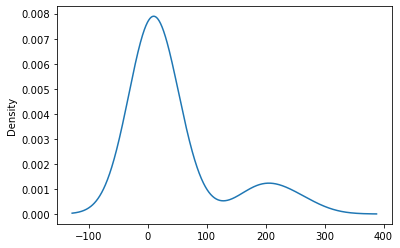

In [50]:
# Visualize band counts
band_counts.plot.density()

In [51]:
# Create bins for the data
replace_bands = list(band_counts[band_counts < 100].index)

# Replace in the dataframe
for band in replace_bands:
    existing_cl_ht_pwr_num.RF_band = existing_cl_ht_pwr_num.RF_band.replace(band,"Other")
    
# Check to make sure binning was successful
existing_cl_ht_pwr_num.RF_band.value_counts()

700, 850, 1900,1700,2300    259
Other                       234
1900 / 2100                 218
1900/AWS                    192
PCS/AWS                     179
Name: RF_band, dtype: int64

In [52]:
# Create OneHotEncoder instance
enc_1 = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
band_encoded_df = pd.DataFrame(enc_1.fit_transform(existing_cl_ht_pwr_num.RF_band.values.reshape(-1,1)),
                              index=existing_cl_ht_pwr_num.index)

# Rename encoded columns
band_encoded_df.columns = enc_1.get_feature_names(['RF_band'])
band_encoded_df.head()

,RF_band_1900 / 2100,RF_band_1900/AWS,"RF_band_700, 850, 1900,1700,2300",RF_band_Other,RF_band_PCS/AWS
id,,,,,
CCL00001,0.0,0.0,1.0,0.0,0.0
CCL00002,0.0,0.0,1.0,0.0,0.0
CCL00005,0.0,0.0,1.0,0.0,0.0
CCL00006,0.0,0.0,1.0,0.0,0.0
CCL00049,0.0,0.0,1.0,0.0,0.0


In [53]:
# Merge the dataframes
existing_cl_ht_pwr_num_band = existing_cl_ht_pwr_num.join(band_encoded_df,how='outer')
existing_cl_ht_pwr_num_band.head()

,carrier,num_ant,RF_band,latitude,longitude,cleaned_height,cleaned_output_pwr_100W_to_500W,cleaned_output_pwr_40W_or_under,cleaned_output_pwr_500W_to_2kW,cleaned_output_pwr_Unknown,cleaned_output_pwr_over_2kW,RF_band_1900 / 2100,RF_band_1900/AWS,"RF_band_700, 850, 1900,1700,2300",RF_band_Other,RF_band_PCS/AWS
id,,,,,,,,,,,,,,,,
CCL00001,AT&T,9.0,"700, 850, 1900,1700,2300",37.786884,-122.45489,87,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
CCL00002,AT&T,9.0,"700, 850, 1900,1700,2300",37.793983,-122.39962,252,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
CCL00005,AT&T,12.0,"700, 850, 1900,1700,2300",37.729811,-122.47384,67,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
CCL00006,AT&T,9.0,"700, 850, 1900,1700,2300",37.755217,-122.41836,120,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
CCL00049,AT&T,6.0,"700, 850, 1900,1700,2300",37.800865,-122.42503,127,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [54]:
# Drop RF_band column
existing_cl_ht_pwr_num_band.drop("RF_band",axis=1,inplace=True)
existing_cl_ht_pwr_num_band.head()

,carrier,num_ant,latitude,longitude,cleaned_height,cleaned_output_pwr_100W_to_500W,cleaned_output_pwr_40W_or_under,cleaned_output_pwr_500W_to_2kW,cleaned_output_pwr_Unknown,cleaned_output_pwr_over_2kW,RF_band_1900 / 2100,RF_band_1900/AWS,"RF_band_700, 850, 1900,1700,2300",RF_band_Other,RF_band_PCS/AWS
id,,,,,,,,,,,,,,,
CCL00001,AT&T,9.0,37.786884,-122.45489,87,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
CCL00002,AT&T,9.0,37.793983,-122.39962,252,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
CCL00005,AT&T,12.0,37.729811,-122.47384,67,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
CCL00006,AT&T,9.0,37.755217,-122.41836,120,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
CCL00049,AT&T,6.0,37.800865,-122.42503,127,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Encode Carrier Info

In [55]:
# Create new OneHotEncoder instance
enc_2 = OneHotEncoder(sparse=False)

# Fit encoder and produce encoded dataframe
carrier_encoded_df = pd.DataFrame(enc_2.fit_transform(existing_cl_ht_pwr_num_band.carrier.values.reshape(-1,1)),
                                  index=existing_cl_ht_pwr_num_band.index)

# Rename encoded columns
carrier_encoded_df.columns = enc_2.get_feature_names(['carrier'])
carrier_encoded_df.head()

,carrier_AT&T,carrier_Clearwire,carrier_Sprint,carrier_T-Mobile,carrier_Verizon Wireless
id,,,,,
CCL00001,1.0,0.0,0.0,0.0,0.0
CCL00002,1.0,0.0,0.0,0.0,0.0
CCL00005,1.0,0.0,0.0,0.0,0.0
CCL00006,1.0,0.0,0.0,0.0,0.0
CCL00049,1.0,0.0,0.0,0.0,0.0


In [56]:
# Merge dataframes
existing_sites_cleaned = existing_cl_ht_pwr_num_band.join(carrier_encoded_df,how='outer')
existing_sites_cleaned.head()

,carrier,num_ant,latitude,longitude,cleaned_height,cleaned_output_pwr_100W_to_500W,cleaned_output_pwr_40W_or_under,cleaned_output_pwr_500W_to_2kW,cleaned_output_pwr_Unknown,cleaned_output_pwr_over_2kW,RF_band_1900 / 2100,RF_band_1900/AWS,"RF_band_700, 850, 1900,1700,2300",RF_band_Other,RF_band_PCS/AWS,carrier_AT&T,carrier_Clearwire,carrier_Sprint,carrier_T-Mobile,carrier_Verizon Wireless
id,,,,,,,,,,,,,,,,,,,,
CCL00001,AT&T,9.0,37.786884,-122.45489,87,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
CCL00002,AT&T,9.0,37.793983,-122.39962,252,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
CCL00005,AT&T,12.0,37.729811,-122.47384,67,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
CCL00006,AT&T,9.0,37.755217,-122.41836,120,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
CCL00049,AT&T,6.0,37.800865,-122.42503,127,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [57]:
# Drop output_pwr_column
existing_sites_cleaned.drop("carrier",axis=1,inplace=True)
existing_sites_cleaned.head()

,num_ant,latitude,longitude,cleaned_height,cleaned_output_pwr_100W_to_500W,cleaned_output_pwr_40W_or_under,cleaned_output_pwr_500W_to_2kW,cleaned_output_pwr_Unknown,cleaned_output_pwr_over_2kW,RF_band_1900 / 2100,RF_band_1900/AWS,"RF_band_700, 850, 1900,1700,2300",RF_band_Other,RF_band_PCS/AWS,carrier_AT&T,carrier_Clearwire,carrier_Sprint,carrier_T-Mobile,carrier_Verizon Wireless
id,,,,,,,,,,,,,,,,,,,
CCL00001,9.0,37.786884,-122.45489,87,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
CCL00002,9.0,37.793983,-122.39962,252,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
CCL00005,12.0,37.729811,-122.47384,67,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
CCL00006,9.0,37.755217,-122.41836,120,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
CCL00049,6.0,37.800865,-122.42503,127,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [58]:
# Drop latitude and longitude
existing_sites_cleaned.drop("latitude",axis=1,inplace=True)
existing_sites_cleaned.drop("longitude",axis=1,inplace=True)

In [59]:
# Write cleaned output data to CSV file
existing_sites_cleaned.to_csv('cleaned_existing_site_data_v2_no_lat_lng_06292021.csv',index=True)

## Columns to Drop/Keep

Columns to drop
- ID
- Search Ring Name ID
- Name of Community Liason 
- Phone Number of Community Liason
- Comments

Columns to keep
- Carrier (maybe)
- Number of Antennas (impacts cost)
- Height to Top of Antenna (impacts cost)
- Power Output (impacts cost)